In [2]:
import warnings
warnings.filterwarnings('ignore')

## The adult dataset 
### The detailed Description of the dataset is given below
**Number of Attributes**
6 continuous, 8 nominal attributes.

**Attribute Information:**
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. class: >50K, <=50K
**Missing Attribute Values:**
7% have missing values.

we have classes for our target class so we can use Classification Technique for building model

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# importing the data
df = pd.read_csv('adult.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

So the code is showing it has no null value but the description is showing it has about 7% of missing value so missing values would have ben replaced by another symbol

In [11]:
# check all uniques
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [12]:
# make a split of data for numerical and categorical columns
numerical = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

categorical = df.loc[:, ~df.columns.isin(numerical)].columns

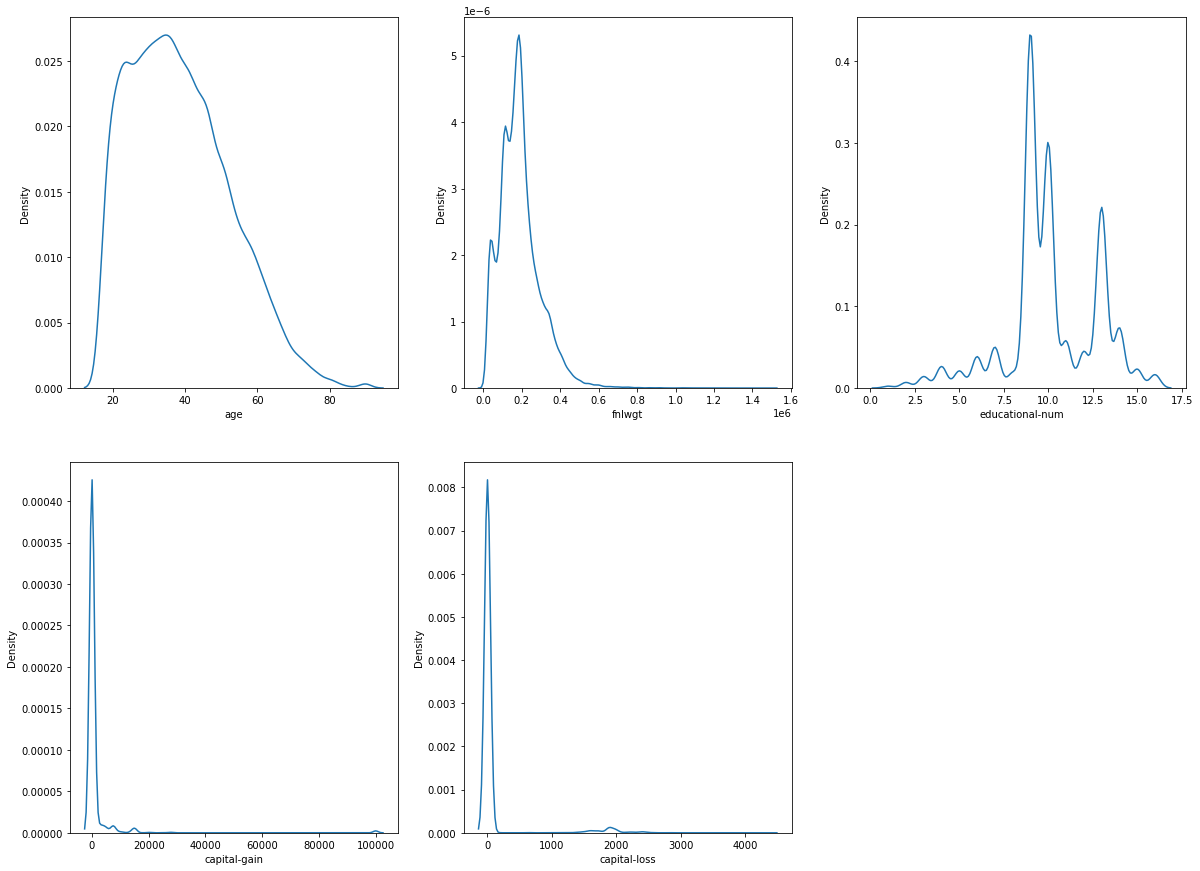

In [26]:
# Numerical columns:
# plot a pobability distribution graph for the 
plt.figure(figsize = (20, 15))

for i, col in enumerate(numerical[:-1]):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[col], hist = False)

<Figure size 1080x720 with 0 Axes>

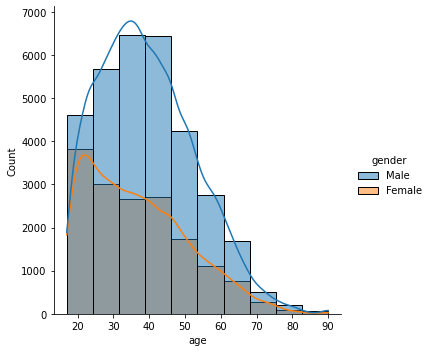

In [105]:
plt.figure(figsize=(15,10))
ax=sns.displot(x = df['age'],kde=True,hue=df['gender'], bins=10)

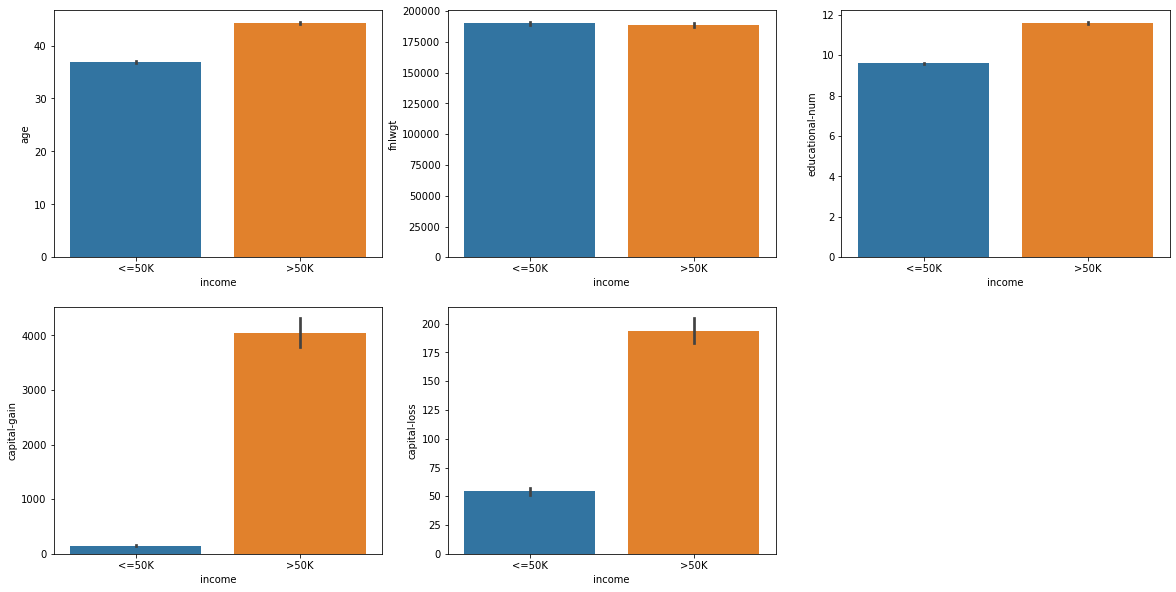

In [31]:
# plot a bar plot of numerical columns
# plot a histogram for the 
plt.figure(figsize = (20, 10))

for i, col in enumerate(numerical[:-1]):
    plt.subplot(2, 3, i+1)
    sns.barplot( df["income"], df[col])

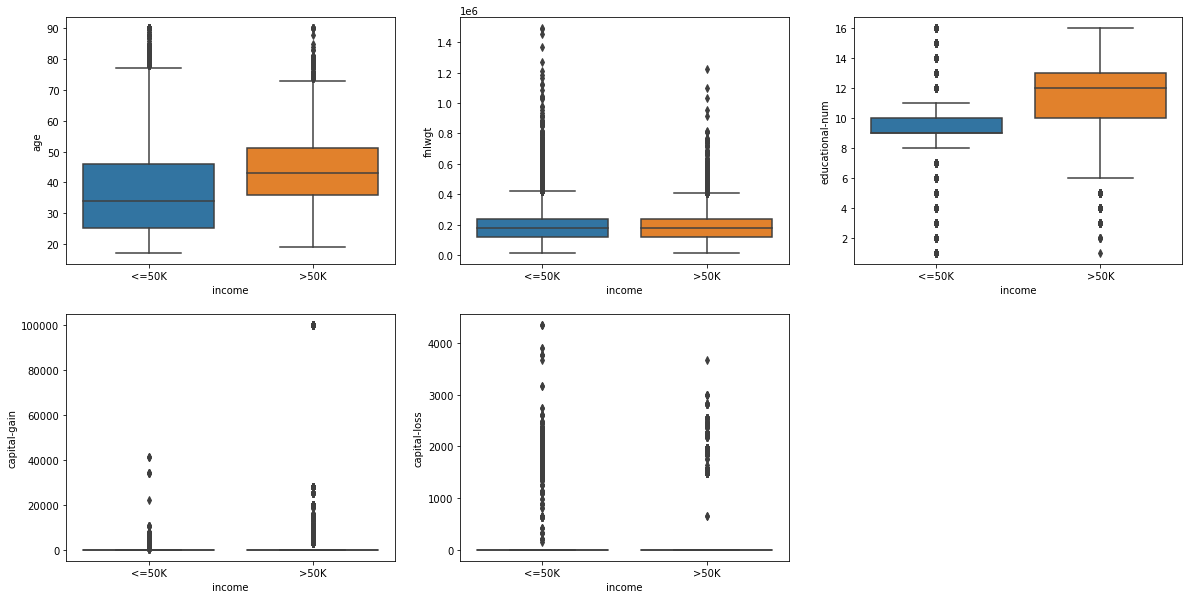

In [35]:
plt.figure(figsize = (20, 10))

for i, col in enumerate(numerical[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot( df["income"], df[col])

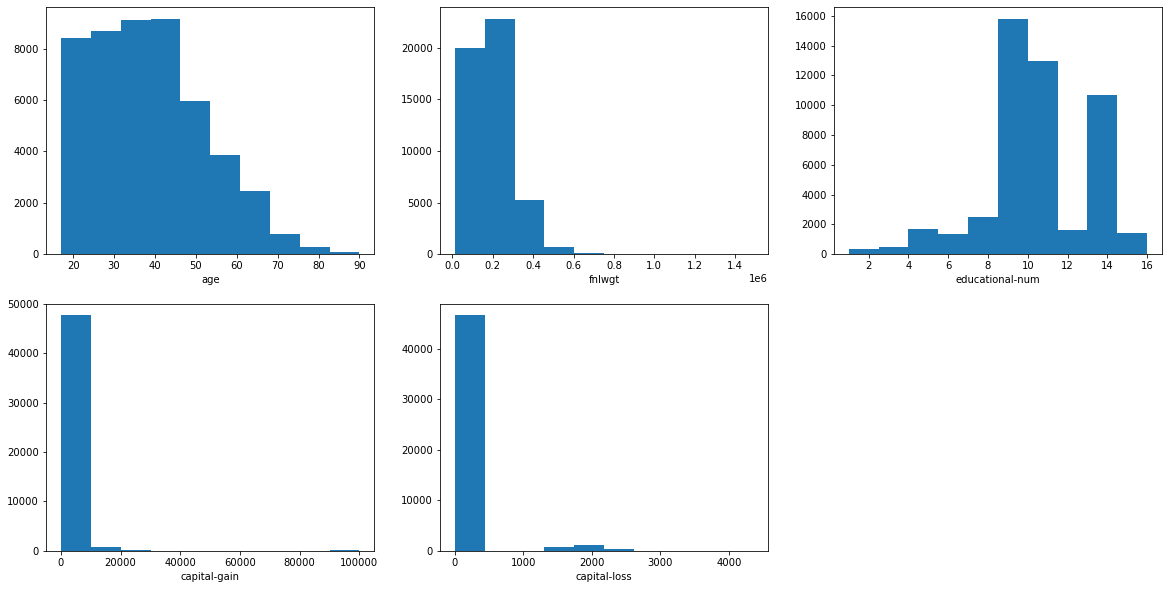

In [68]:
plt.figure(figsize = (20, 10))

for i, col in enumerate(numerical[:-1]):
    plt.subplot(2, 3, i+1)
    plt.xlabel(col)
    plt.hist(df[col])

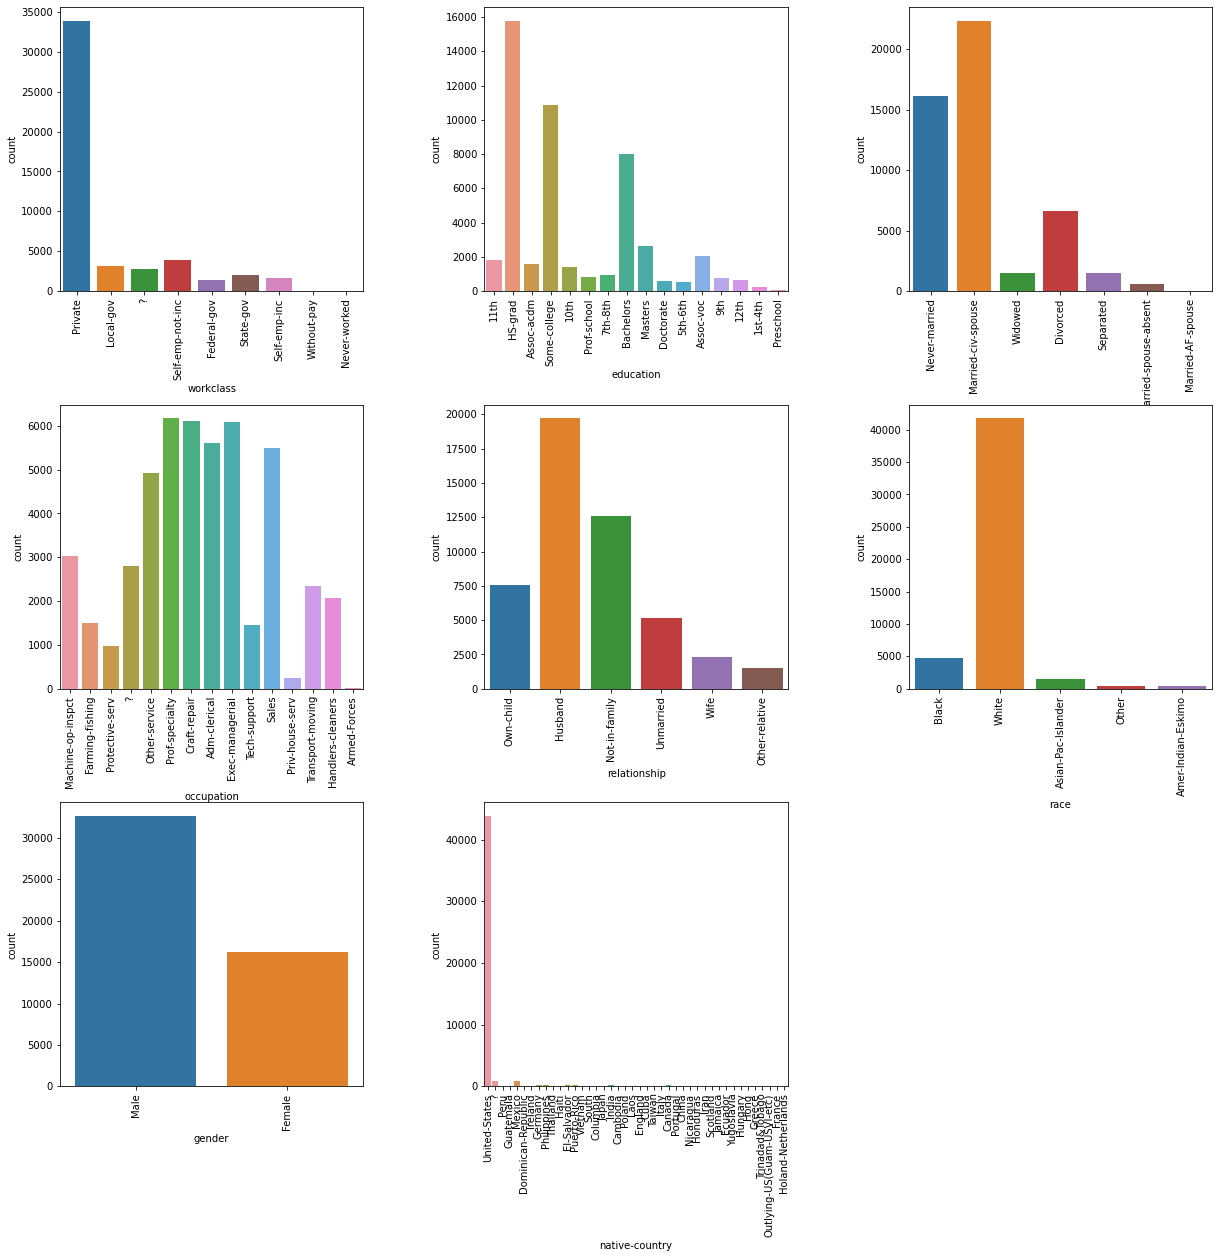

In [49]:
# Categorical Columns:
plt.figure(figsize = (20, 10))

for i, col in enumerate(categorical [:-1]):
    plt.subplot(3, 3, i+1)
    sns.countplot(df[col])
    plt.xticks(rotation = 90)
    plt.subplots_adjust(left=0.1,
                    bottom=0.001, 
                    right=0.9, 
                    top= 1.5, 
                    wspace=0.4, 
                    hspace=0.4)

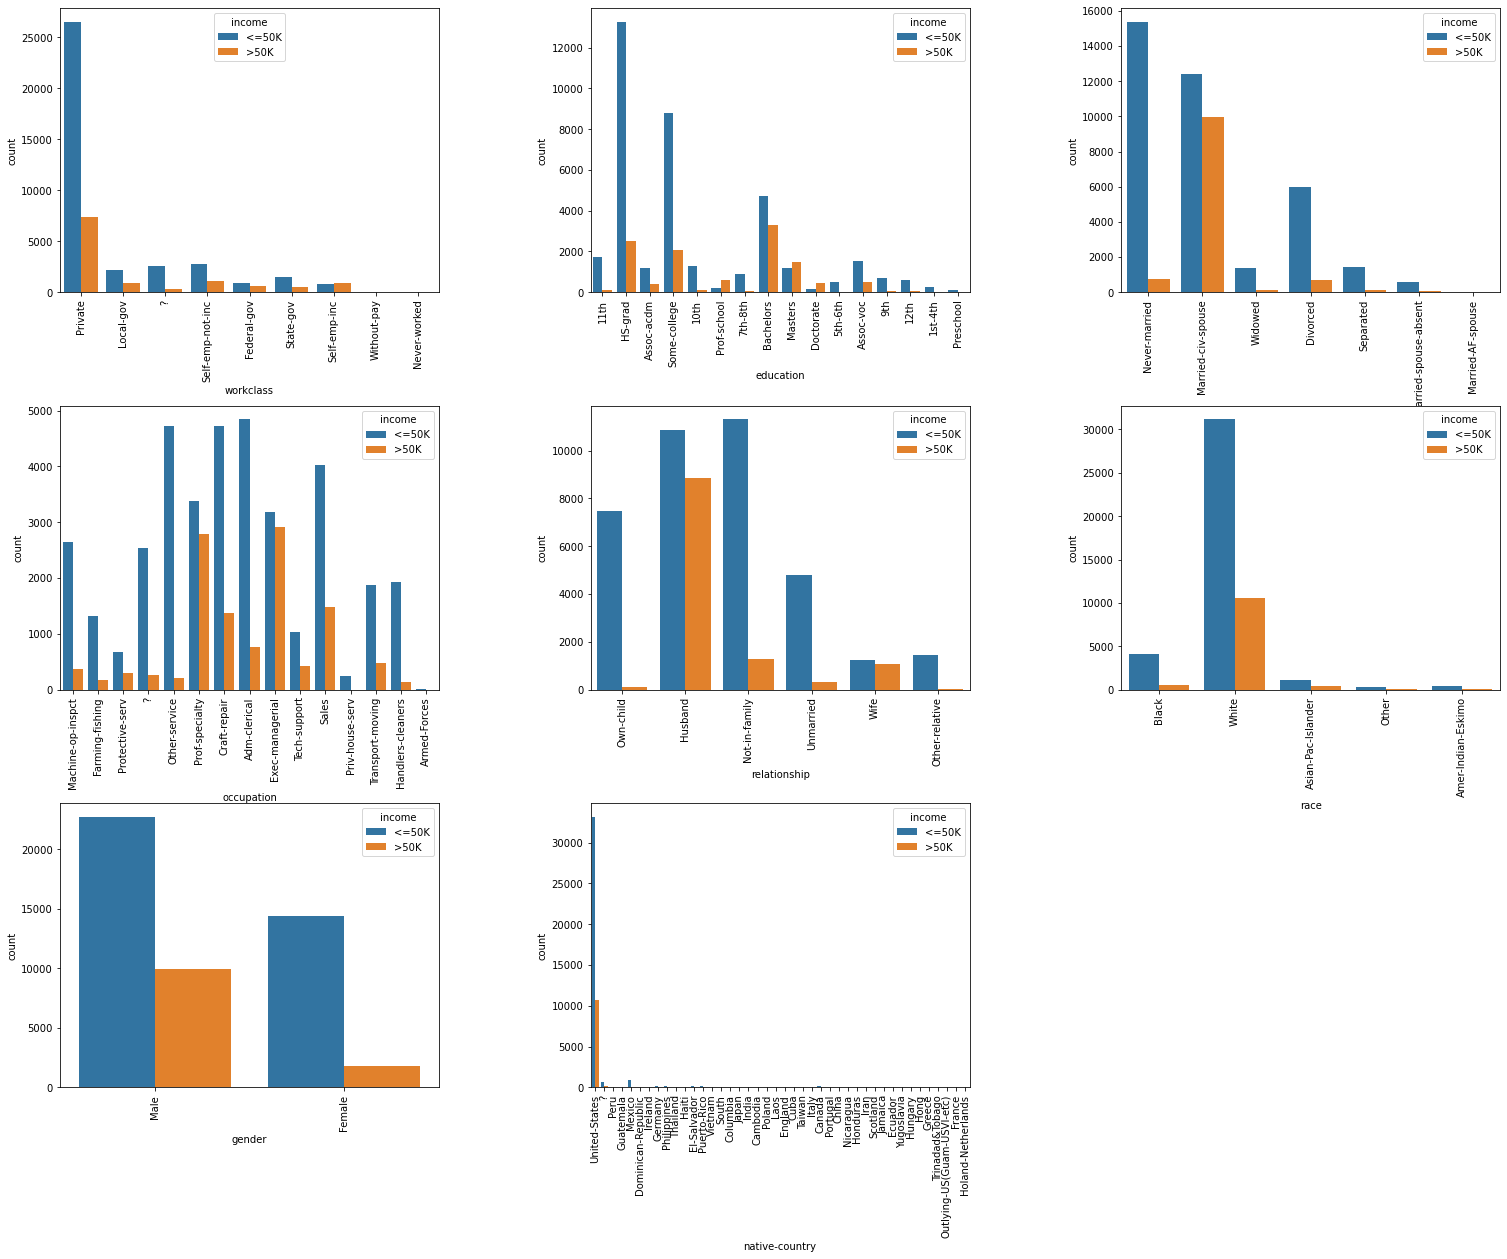

In [60]:
# add a hue param to check with the salary
plt.figure(figsize = (25, 10))

for i, col in enumerate(categorical [:-1]):
    plt.subplot(3, 3, i+1)
    sns.countplot(df[col], hue = df['income'])
    plt.xticks(rotation = 90)
    plt.subplots_adjust(left=0.1,
                    bottom=0.001, 
                    right=0.9, 
                    top= 1.5, 
                    wspace=0.4, 
                    hspace=0.4)

**we can see there are some values that are denote by ? in workclass, occupation and native countery so we need to impute to them**

In [67]:
# check the percentage of ? in these row so that we can decide what we have to do
(df['native-country']== '?').value_counts(normalize=True)

False    0.982454
True     0.017546
Name: native-country, dtype: float64

In [69]:
(df['workclass']== '?').value_counts(normalize=True)

False    0.942693
True     0.057307
Name: workclass, dtype: float64

In [71]:
(df['occupation']== '?').value_counts(normalize=True)

False    0.942488
True     0.057512
Name: occupation, dtype: float64

### Came across an amazing class to check all the details:

In [75]:
class feature_details:
    
    
    def categorical_feature_details(self,categorical_df):
        
        print("\n==================================================================")
        print("                   CATEGORICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=categorical_df.columns
    
        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________")



            #nulls
            
            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=np.round((nulls/(len(df[col])))*100,2)
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))

            uniqs=df[col].unique()
            print("\n    Unique values are:")
            for i in range(len(uniqs)):
                print('    ',i+1,'-',uniqs[i])
                
            
            #value_counts
            
            val_cnt=df[col].value_counts()
            print("\n    Unique values counts:")
            print("        ")
            print(val_cnt)
                
                
                
                
    def categorywise_outliers_details(self,categorical_df,target_column):
        
        df=pd.concat([categorical_df,target_column],axis=1)
        targetcol=target_column.name
        cols=df.columns
        
        
        print("\n=====================================================================")
        print("\n                   CATEGORYWISE OUTLIERS DETAILS:                    ")
        print("               (with respect to target variable: {} )               \n".format(targetcol))

        print("=====================================================================")
        
        
        for i in range(len(cols)):

            col=cols[i]

            if col==targetcol:
                continue
            else:
                print("\n\n________________")
                print("\nCOLUMN: {} ".format(col.upper()))
                print("________________")
                cats=df[col].unique()
            
            for i in range(len(cats)):
                cat=cats[i]

                print("\n\n      {}. Category: {} \n".format(i+1,cat))



                q75,q25=np.percentile(df[df[col]==cat][targetcol],[75,25])
                iqr=np.round(q75-q25,3)
                upperlim=np.round(q75+(1.5*iqr),3)
                lowerlim=np.round(q25-(1.5*iqr),3)



                upper_indexes=df[(df[col]==cat) & (df[targetcol]>upperlim)].index
                lower_indexes=df[(df[col]==cat) & (df[targetcol]<lowerlim)].index

                mini=df[df[col]==cat][targetcol].min()
                maxi=df[df[col]==cat][targetcol].max()
                avg=np.round(df[df[col]==cat][targetcol].mean(),2)
                print("                Minimum {} for {} is: {}".format(targetcol,cat,mini))
                print("                Maximum {} for {} is: {}".format(targetcol,cat,maxi))
                print("                Average {} for {} is: {}\n".format(targetcol,cat,avg))
                
                print("                Upper Limit is {}".format(upperlim))
                print("                Lower Limit is {}".format(lowerlim))
                
                
                
                if (len(upper_indexes)>0) or (len(lower_indexes)>0):

                    if len(upper_indexes)>0:
                        print("\n                  >>> HIGHER OUTLIERS: {} ".format(len(upper_indexes)))
                        print("                \nOutliers are at index nos: \n",list(upper_indexes))
                        

                    if len(lower_indexes)>0:
                        print("                  >>> LOWER OUTLIERS: {} \n".format(len(lower_indexes)))
                        print("                \nOutliers are at index nos: \n",list(lower_indexes))
                        

                else:
                    print("                  NO OUTLIERS")
                    
                    
                
            
                

                
                
    def numerical_feature_details(self,numerical_df):
        print("\n==================================================================")
        print("                   NUMERICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=numerical_df.columns

        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________\n")


            
            mins=df[col].min()
            maxs=df[col].max()
            avgs=np.round(df[col].mean(),2)
            
            print("Minimum {} is {}".format(col,mins))
            print("Maximum {} is {}".format(col,maxs))
            print("Average {} is {}".format(col,avgs))
            
            
            
            
            #nulls

            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=np.round((nulls/(len(df[col])))*100,2)
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))



            #outliers
            
            print('\nOUTLIERS:-\n')


            q75,q25=np.percentile(df[col],[75,25])
            iqr=np.round(q75-q25,3)
            upperlim=np.round(q75+(1.5*iqr),3)
            lowerlim=np.round(q25-(1.5*iqr),3)
            
            print("    25th Percentile is: ",q25)
            print("    75th Percentile is: ",q75)

            print("    Inter Quartile range is: ",iqr)

            print("    Upper limit is: ", upperlim)
            print("    Lower limit is: ", lowerlim)
                        
            print('\n')    
            print("    >>> HIGHER OUTLIERS: {} ".format(len(df[df[col]>upperlim])))
            print("    >>> LOWER OUTLIERS: {} ".format(len(df[df[col]<lowerlim])))
            print('\n\n')


            
            

       

In [77]:
# instanciate the above class
feature_details=feature_details()

In [80]:
feature_details.categorical_feature_details(df[categorical])


                   CATEGORICAL FEATURE DETAILS                     


________________

Feature: workclass
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 9 unique values

    Unique values are:
     1 - Private
     2 - Local-gov
     3 - ?
     4 - Self-emp-not-inc
     5 - Federal-gov
     6 - State-gov
     7 - Self-emp-inc
     8 - Without-pay
     9 - Never-worked

    Unique values counts:
        
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


________________

Feature: education
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 16 unique values

    Unique values are:
     1 - 11th


In [123]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [119]:
# workclass feature : ? is about 5 percentage and can be replaced by mode
df['workclass'].mode()

0    Private
dtype: object

In [109]:
# to remove the ? from workclass column we can replave it with the mode of the column
df['workclass']=df['workclass'].replace('?',df['workclass'].mode()[0])

In [111]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

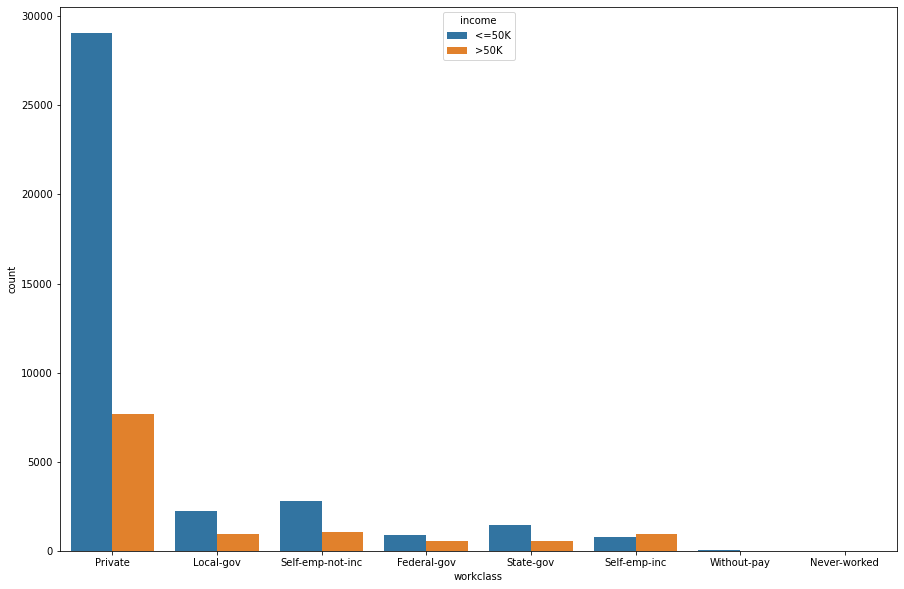

In [118]:
plt.figure(figsize = (15, 10))
sns.countplot(x = df['workclass'], hue = df['income'])


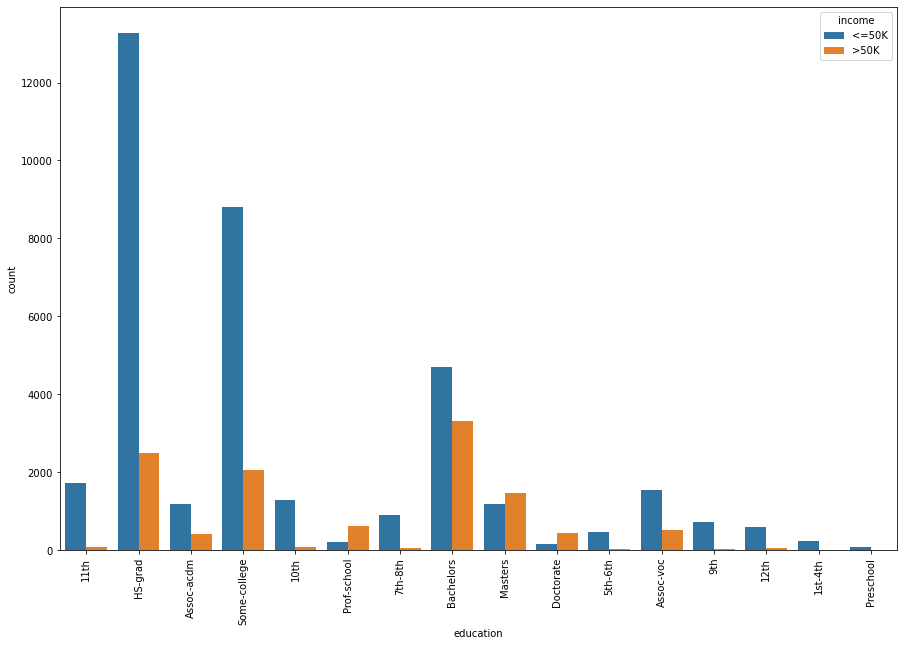

In [122]:
# education feature
plt.figure(figsize=(15,10))
ax=sns.countplot(df['education'], hue = df['income'])
plt.xticks(rotation = 90);

**occupation we can compre the feature with different classes and decide with what ? can be changed**

as the ? is also in large quantity

In [130]:
categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [125]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [127]:
df[df['occupation'] == '?']['income'].value_counts()

<=50K    2544
>50K      265
Name: income, dtype: int64

**most of them are having values <=50k**

In [131]:
df[df['occupation']=='?']['workclass'].value_counts()

Private         2799
Never-worked      10
Name: workclass, dtype: int64

**most of them are having values Private**

In [132]:
df[df['occupation']=='?']['education'].value_counts()

Some-college    842
HS-grad         812
Bachelors       253
11th            181
10th            150
7th-8th         111
Assoc-voc        83
Assoc-acdm       72
9th              69
Masters          67
12th             58
5th-6th          41
Prof-school      24
Doctorate        18
1st-4th          18
Preschool        10
Name: education, dtype: int64

**Most of the values are from some-college**

In [135]:
df[df['occupation'] == '?']['marital-status'].value_counts()

Never-married            1242
Married-civ-spouse        928
Divorced                  270
Widowed                   222
Separated                  97
Married-spouse-absent      45
Married-AF-spouse           5
Name: marital-status, dtype: int64

**Most of the values are from Never-married**

In [137]:
df[df['occupation'] == '?']['relationship'].value_counts()

Own-child         875
Husband           711
Not-in-family     667
Unmarried         258
Wife              192
Other-relative    106
Name: relationship, dtype: int64

**Most of the values are from Own-child**

In [139]:
df[df['occupation'] == '?']['race'].value_counts()

White                 2318
Black                  329
Asian-Pac-Islander      96
Amer-Indian-Eskimo      35
Other                   31
Name: race, dtype: int64

**Most of the values are from White**

In [142]:
df[df['occupation'] == '?']['gender'].value_counts()

Male      1536
Female    1273
Name: gender, dtype: int64

**Most of the values are from male**

In [141]:
df[df['occupation'] == '?']['native-country'].value_counts()

United-States                 2540
Mexico                          48
?                               46
Canada                          19
South                           14
Germany                         13
Philippines                     12
Taiwan                          10
China                            9
Puerto-Rico                      9
El-Salvador                      8
England                          8
Poland                           6
Dominican-Republic               6
Haiti                            6
Cuba                             5
Portugal                         5
Italy                            5
India                            4
Jamaica                          3
Iran                             3
Columbia                         3
Vietnam                          3
Japan                            3
Guatemala                        2
France                           2
Cambodia                         2
Hong                             2
Laos                

**Most of the values are from United-States**

In [144]:
df[df['gender'] == 'Male']['occupation'].value_counts()

Craft-repair         5789
Exec-managerial      4338
Prof-specialty       3930
Sales                3557
Transport-moving     2228
Other-service        2225
Machine-op-inspct    2218
Adm-clerical         1842
Handlers-cleaners    1818
?                    1536
Farming-fishing      1395
Tech-support          884
Protective-serv       861
Armed-Forces           15
Priv-house-serv        14
Name: occupation, dtype: int64

In [145]:
df[df['gender'] == 'Female']['occupation'].value_counts()

Adm-clerical         3769
Other-service        2698
Prof-specialty       2242
Sales                1947
Exec-managerial      1748
?                    1273
Machine-op-inspct     804
Tech-support          562
Craft-repair          323
Handlers-cleaners     254
Priv-house-serv       228
Transport-moving      127
Protective-serv       122
Farming-fishing        95
Name: occupation, dtype: int64

There are some missing values in 'occupation' feature:

people with missing occupation are more likely to have,
1. income lesser than 50k
2. completed their some-college
3. are male
4. are never married
5. are from United-States
>If gender is 'Female' it implies occupation is more likely to be 'Adm-clerical', if gender is 'Male' occupation is more likly to be 'Other-service'.

In [146]:
# so from above conclusion we can say
for i in range(len(df)):
    if df['occupation'].iloc[i] == '?':
        if df['gender'].iloc[i] == 'Male':
            df['occupation'].iloc[i] = 'Other-service'
        elif df['gender'].iloc[i] == 'Female':
            df['occupation'].iloc[i] = 'Adm-clerical'

In [147]:
df['occupation'].value_counts()

Adm-clerical         6884
Other-service        6459
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Sales                5504
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [148]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

**here also most of the people are from United-States we can replace ? by it ie mode** 

In [149]:
df['native-country'].mode()

0    United-States
dtype: object

In [150]:
df['native-country']=df['native-country'].replace('?',df['native-country'].mode()[0])

In [151]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [155]:
#check details of numerical columns
feature_details.numerical_feature_details(df[numerical])


                   NUMERICAL FEATURE DETAILS                     


________________

Feature: age
________________

Minimum age is 17
Maximum age is 90
Average age is 38.64


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 74 unique values

OUTLIERS:-

    25th Percentile is:  28.0
    75th Percentile is:  48.0
    Inter Quartile range is:  20.0
    Upper limit is:  78.0
    Lower limit is:  -2.0


    >>> HIGHER OUTLIERS: 216 
    >>> LOWER OUTLIERS: 0 





________________

Feature: fnlwgt
________________

Minimum fnlwgt is 12285
Maximum fnlwgt is 1490400
Average fnlwgt is 189664.13


NULLS:-

    0.0 % Null values 
    (i.e Out of 48842 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 28523 unique values

OUTLIERS:-

    25th Percentile is:  117550.5
    75th Percentile is:  237642.0
    Inter Quartile range is:  120091.5
    Upper limit is:  417779.25
    Lower limit is:  -62586.75


    

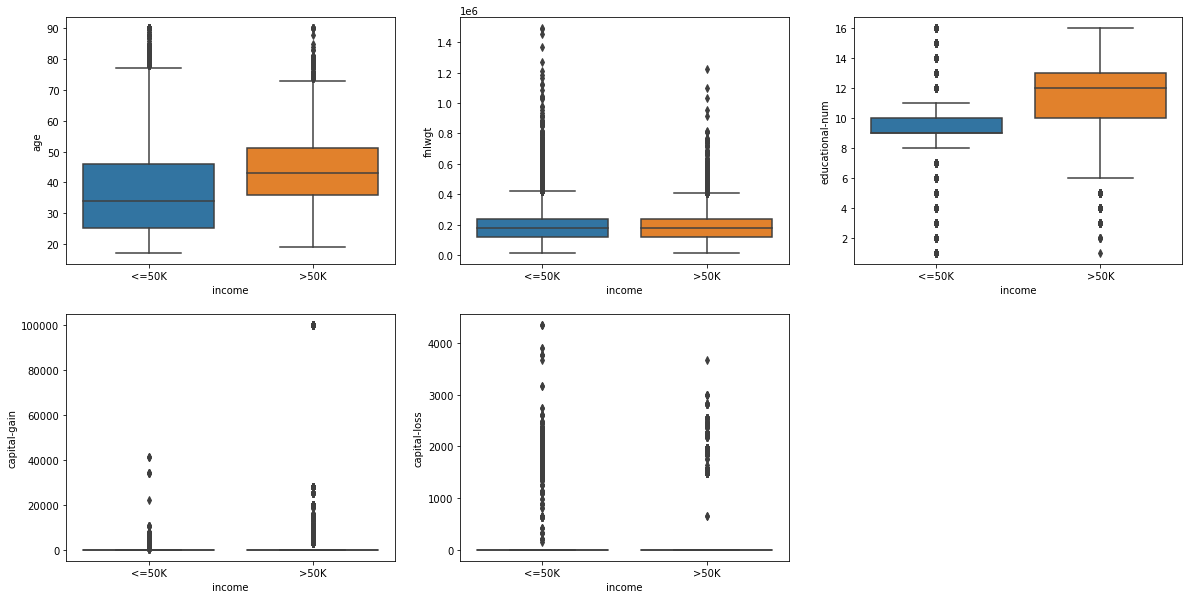

In [156]:
# same can been seen in this plot
plt.figure(figsize = (20, 10))

for i, col in enumerate(numerical[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot( df["income"], df[col])

In [157]:
###outlier dectections

In [265]:
X = df.drop("income", axis = 1)
y = df['income']

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=True)

In [267]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 14), (9769, 14), (39073,), (9769,))

In [268]:
df_cat_train = X_train.select_dtypes(include='object')

In [269]:
df_num_train = X_train.select_dtypes(exclude='object')

In [270]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df_num_train_rescaled = pd.DataFrame(scaler.fit_transform(df_num_train), 
                                    columns = df_num_train.columns, 
                                    index = df_num_train.index)

df_num_train_rescaled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
26051,2.877753,-0.744296,-2.362569,-0.143703,-0.215629,-0.436980
47048,0.760244,-0.641666,-0.028229,-0.143703,-0.215629,-1.247662
33914,1.709472,-0.201820,-2.362569,-0.143703,-0.215629,-2.869027
22131,-1.503301,-0.753345,-1.584456,-0.143703,-0.215629,-2.382617
46451,0.103086,1.726496,-0.806342,-0.143703,-0.215629,-0.031638
...,...,...,...,...,...,...
43723,0.176103,-1.445025,-0.028229,-0.143703,-0.215629,-0.031638
32511,-0.846143,-0.089811,-0.417285,-0.143703,-0.215629,-0.031638
5192,-1.503301,-0.098832,-0.417285,-0.143703,-0.215629,-1.653003
12172,0.541191,-0.422536,0.360828,-0.143703,-0.215629,-0.031638


In [271]:
df_cat_train
# we can perform one hot encoding as all data is nominal

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
26051,Private,7th-8th,Never-married,Machine-op-inspct,Not-in-family,White,Female,Dominican-Republic
47048,Self-emp-inc,Some-college,Divorced,Sales,Not-in-family,White,Male,United-States
33914,Self-emp-not-inc,7th-8th,Married-civ-spouse,Sales,Husband,White,Male,United-States
22131,Private,10th,Never-married,Other-service,Own-child,White,Male,United-States
46451,Private,12th,Married-civ-spouse,Other-service,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
43723,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
32511,Private,HS-grad,Separated,Machine-op-inspct,Unmarried,White,Female,United-States
5192,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,United-States
12172,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [272]:
# One hot encoding
df_cat_train_dum=pd.get_dummies(df_cat_train, drop_first=True)

In [273]:
df_cat_train_dum

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
26051,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47048,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33914,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22131,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
46451,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32511,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5192,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12172,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [274]:
# concatinate
df_train_final = pd.concat([df_num_train_rescaled,df_cat_train_dum],axis=1)

In [275]:
df_train_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
26051,2.877753,-0.744296,-2.362569,-0.143703,-0.215629,-0.436980,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47048,0.760244,-0.641666,-0.028229,-0.143703,-0.215629,-1.247662,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
33914,1.709472,-0.201820,-2.362569,-0.143703,-0.215629,-2.869027,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22131,-1.503301,-0.753345,-1.584456,-0.143703,-0.215629,-2.382617,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
46451,0.103086,1.726496,-0.806342,-0.143703,-0.215629,-0.031638,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.176103,-1.445025,-0.028229,-0.143703,-0.215629,-0.031638,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32511,-0.846143,-0.089811,-0.417285,-0.143703,-0.215629,-0.031638,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5192,-1.503301,-0.098832,-0.417285,-0.143703,-0.215629,-1.653003,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12172,0.541191,-0.422536,0.360828,-0.143703,-0.215629,-0.031638,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### preparing test data

In [276]:
df_cat_test = X_test.select_dtypes(include='object')

In [277]:
df_num_test= X_test.select_dtypes(exclude='object')

In [278]:
df_cat_test

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
391,Private,HS-grad,Never-married,Transport-moving,Own-child,Black,Male,United-States
1899,Private,HS-grad,Never-married,Machine-op-inspct,Unmarried,Black,Male,United-States
24506,Self-emp-not-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32816,Private,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,United-States
47892,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
12999,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
43011,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
34781,Local-gov,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
23537,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female,United-States


In [279]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df_num_test_rescaled = pd.DataFrame(scaler.fit_transform(df_num_test), 
                                    columns = df_num_test.columns, 
                                    index = df_num_test.index)

df_num_test_rescaled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
391,-0.571253,0.347884,-0.427544,-0.14915,-0.223052,-0.043674
1899,-1.007043,-0.370469,-0.427544,-0.14915,-0.223052,-0.043674
24506,-0.208095,1.496194,2.292660,-0.14915,-0.223052,-0.836563
32816,-0.934411,-0.540658,1.126858,-0.14915,4.574640,-0.043674
47892,-0.643885,-1.378784,1.126858,-0.14915,-0.223052,-0.043674
...,...,...,...,...,...,...
12999,-0.353359,-1.448767,-0.038944,-0.14915,-0.223052,-0.043674
43011,-0.571253,0.880738,-0.038944,-0.14915,-0.223052,0.352770
34781,1.171904,0.643065,-0.427544,-0.14915,-0.223052,-0.043674
23537,0.082431,-0.509146,-0.427544,-0.14915,-0.223052,0.352770


In [282]:
df_cat_test.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
391,Private,HS-grad,Never-married,Transport-moving,Own-child,Black,Male,United-States
1899,Private,HS-grad,Never-married,Machine-op-inspct,Unmarried,Black,Male,United-States
24506,Self-emp-not-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Male,United-States
32816,Private,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,United-States
47892,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [283]:
# One hot encoding
df_cat_test_dum=pd.get_dummies(df_cat_test, drop_first=True)

In [284]:
df_cat_test_dum

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
391,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1899,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24506,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32816,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47892,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12999,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43011,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34781,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23537,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [285]:
# concatinate
df_test_final = pd.concat([df_num_test_rescaled,df_cat_test_dum],axis=1)

In [286]:
df_test_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
391,-0.571253,0.347884,-0.427544,-0.14915,-0.223052,-0.043674,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1899,-1.007043,-0.370469,-0.427544,-0.14915,-0.223052,-0.043674,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24506,-0.208095,1.496194,2.292660,-0.14915,-0.223052,-0.836563,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32816,-0.934411,-0.540658,1.126858,-0.14915,4.574640,-0.043674,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
47892,-0.643885,-1.378784,1.126858,-0.14915,-0.223052,-0.043674,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12999,-0.353359,-1.448767,-0.038944,-0.14915,-0.223052,-0.043674,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43011,-0.571253,0.880738,-0.038944,-0.14915,-0.223052,0.352770,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
34781,1.171904,0.643065,-0.427544,-0.14915,-0.223052,-0.043674,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23537,0.082431,-0.509146,-0.427544,-0.14915,-0.223052,0.352770,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [289]:
df_train_final.columns.difference(df_test_final.columns)

Index(['native-country_Holand-Netherlands'], dtype='object')

In [290]:
df_train_final.drop(['native-country_Holand-Netherlands'], inplace = True, axis = 1)

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [295]:
models = {'Logistic Regression' : LogisticRegression(),
        'KNN' : KNeighborsClassifier(),
        'Random Forest Classifier' : RandomForestClassifier()}

# Create a function to fit and score the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels 
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # loops through models
    for name, model in models.items():
        # Fit the model to data
        model.fit(x_train, y_train)
        #Evaluate the model and append its score to model score dict
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [296]:
model_scores = fit_and_score(models = models,
                      x_train=df_train_final,
                      x_test=df_test_final,
                      y_train=y_train,
                      y_test=y_test)
model_scores

{'Logistic Regression': 0.8552564233800799,
 'KNN': 0.8371378851468932,
 'Random Forest Classifier': 0.8483979936533934}

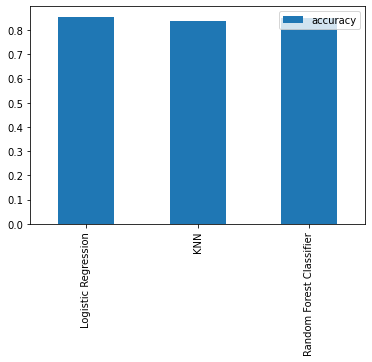

In [297]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()

* RandomForestClassifier()

as these two classifier are better than KNN

... using RandomizedSearchCV



In [316]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# Create a grid for log reg
log_reg_grid = {'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear']}
# Create a grid for Random forest

rs_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2)}

In [317]:
## Tune The logestic regissor

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(df_train_final,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [318]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [321]:
rs_log_reg.score(df_test_final, y_test)

0.8547446002661481

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...



In [327]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rs_grid,
                           cv=2,
                           n_iter=10,
                           verbose=True)
rs_rf.fit(df_train_final,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [328]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [329]:
rs_rf.score(df_test_final, y_test)

0.8573037158358071

### we can conclude all the 3 classifier can be used as they have almost as accuracy

In [341]:
y_preds = rs_rf.predict(df_test_final)

In [343]:
# predicted data frame:
X_test["predicted income"] = y_preds

In [345]:
X_test['Actual income'] = y_test

In [347]:
X_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predicted income,Actual income
391,31,Private,224234,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,<=50K,<=50K
1899,25,Private,149486,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,40,United-States,<=50K,<=50K
24506,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,United-States,<=50K,>50K
32816,26,Private,131777,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,2002,40,United-States,>50K,<=50K
47892,30,Local-gov,44566,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,<=50K
